In [107]:
#Libraries for data processing
import numpy as np 
import pandas as pd

#Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(color_codes = True)
sns.set(font_scale=1.5) # fixe la taille de la police à 1.5 * 12pt

#Libraries for artificial neural network
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Normalization
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.preprocessing import MinMaxScaler

In [108]:
from logging import RootLogger
# Mount Google Drive
from google.colab import drive # import drive from google colab

root = "/content/drive"     # default location for the drive

drive.mount(root)           # we mount the google drive at /content/drive

# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join  

# path to your project on Google Drive
my_google_drive_path = "MyDrive/StudentProject2023"

project_path = join(root, my_google_drive_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
train_data = pd.read_csv(join(project_path,"processed_data/train_merged_data.csv"), sep=";")

### We are adding more terms to our artificial neural network so it can perform better, these terms are the ones in the liquid drop model

In [110]:
train_data["Surf"] = np.power(train_data["A"],2/3)

train_data["Asym"] = ( (train_data["N"]-train_data["Z"])**2 ) / train_data["A"]

train_data["Coul"] = ( train_data["Z"]*(train_data["Z"]-1) ) / np.power(train_data["A"],1/3)

train_data["Pair"] = np.power(train_data["A"],-1/2)

train_data["Z_parity"] = np.power(-1,train_data["Z"])

train_data["N_parity"] = np.power(-1,train_data["N"])

In [111]:
#First inputs
target = train_data["ame_BE"]
n_input = train_data["N"]
z_input = train_data["Z"]

#Liquid drop inputs
surf_input = train_data["Surf"]
asym_input = train_data["Asym"]
coul_input = train_data["Coul"]
pair_input = train_data["Pair"]

#Other inputs that may help
z_parity_input = train_data["Z_parity"]
n_parity_input = train_data["N_parity"]

#Artificial networks work best when using data between 0 and 1 

#We rescale our first inputs
scaler = MinMaxScaler(feature_range=(0,1))

scaled_n = scaler.fit_transform(pd.Series.to_numpy(n_input).reshape(-1,1))
scaled_z = scaler.fit_transform(pd.Series.to_numpy(z_input).reshape(-1,1))

#We rescale our liquid drop inputs
scaled_coul = scaler.fit_transform(pd.Series.to_numpy(coul_input).reshape(-1,1))
scaled_surf = scaler.fit_transform(pd.Series.to_numpy(surf_input).reshape(-1,1))
scaled_asym = scaler.fit_transform(pd.Series.to_numpy(asym_input).reshape(-1,1))
scaled_pair = scaler.fit_transform(pd.Series.to_numpy(pair_input).reshape(-1,1))

#We rescale our other inputs
scaled_z_parity = scaler.fit_transform(pd.Series.to_numpy(z_parity_input).reshape(-1,1))
scaled_n_parity = scaler.fit_transform(pd.Series.to_numpy(n_parity_input).reshape(-1,1))
scaled_target = scaler.fit_transform(pd.Series.to_numpy(target).reshape(-1,1))

In [112]:
input1=keras.layers.Input(shape=(1,))
input2=keras.layers.Input(shape=(1,))
input3=keras.layers.Input(shape=(1,))
input4=keras.layers.Input(shape=(1,))
input5=keras.layers.Input(shape=(1,))
input6=keras.layers.Input(shape=(1,))

#merged = keras.layers.Concatenate()([input1, input2, input3, input4, input5, input6])
merged = keras.layers.Concatenate()([input1, input2])
dense1 = keras.layers.Dense(64, input_dim=2, activation="relu")(merged)
dense2 = keras.layers.Dense(64, activation="relu")(dense1)
dense3 = keras.layers.Dense(64, activation="relu")(dense2)
dense4 = keras.layers.Dense(64, activation="relu")(dense3)
output = keras.layers.Dense(1, activation="relu")(dense4)
model4 = keras.models.Model(([input1, input2]),output)

In [113]:
model4.compile(optimizer=Adam(learning_rate=0.0001), loss="mean_squared_error")

Epoch 1/100
301/301 - 1s - loss: 0.0407 - 1s/epoch - 3ms/step
Epoch 2/100
301/301 - 1s - loss: 6.2429e-05 - 636ms/epoch - 2ms/step
Epoch 3/100
301/301 - 1s - loss: 3.7068e-05 - 665ms/epoch - 2ms/step
Epoch 4/100
301/301 - 1s - loss: 2.7323e-05 - 826ms/epoch - 3ms/step
Epoch 5/100
301/301 - 1s - loss: 2.0875e-05 - 918ms/epoch - 3ms/step
Epoch 6/100
301/301 - 1s - loss: 1.6781e-05 - 965ms/epoch - 3ms/step
Epoch 7/100
301/301 - 1s - loss: 1.3694e-05 - 898ms/epoch - 3ms/step
Epoch 8/100
301/301 - 1s - loss: 1.1183e-05 - 690ms/epoch - 2ms/step
Epoch 9/100
301/301 - 1s - loss: 9.1876e-06 - 657ms/epoch - 2ms/step
Epoch 10/100
301/301 - 1s - loss: 7.7115e-06 - 652ms/epoch - 2ms/step
Epoch 11/100
301/301 - 1s - loss: 6.2046e-06 - 643ms/epoch - 2ms/step
Epoch 12/100
301/301 - 1s - loss: 5.3058e-06 - 646ms/epoch - 2ms/step
Epoch 13/100
301/301 - 1s - loss: 4.7646e-06 - 661ms/epoch - 2ms/step
Epoch 14/100
301/301 - 1s - loss: 3.9139e-06 - 657ms/epoch - 2ms/step
Epoch 15/100
301/301 - 1s - loss: 3.

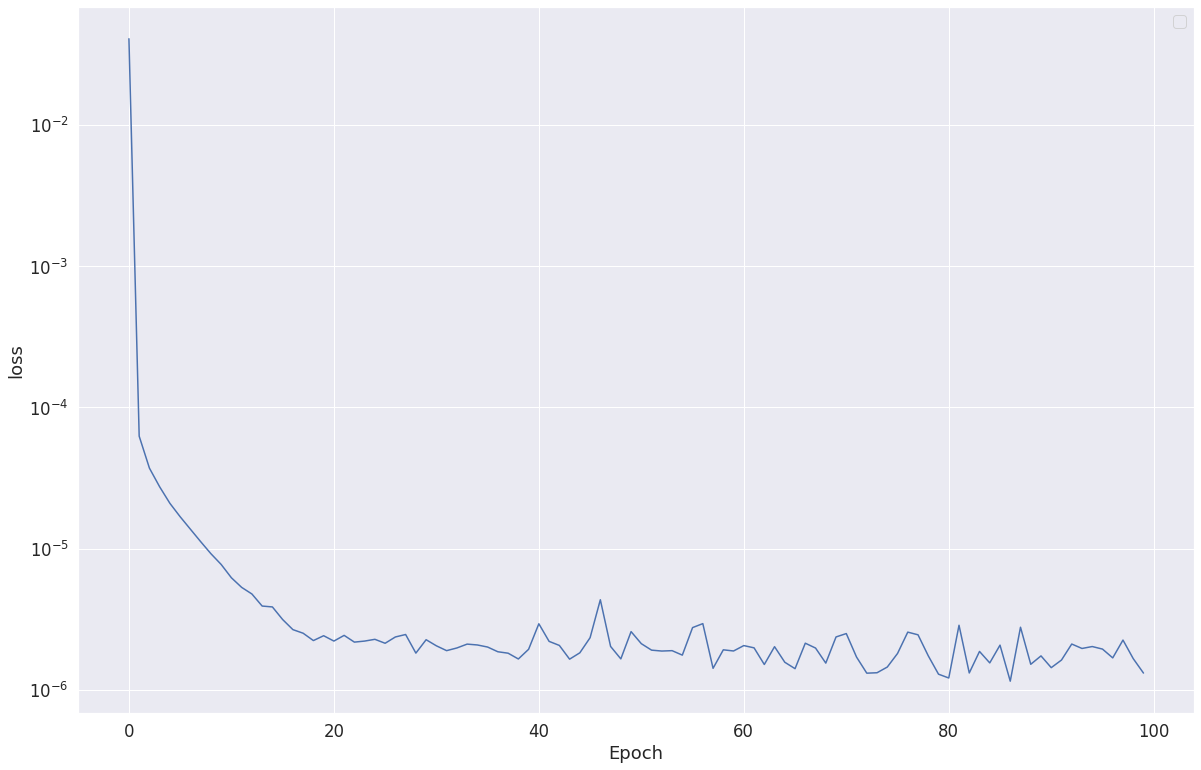

In [114]:
#history4=model4.fit(x=(scaled_n,scaled_z,scaled_surf, scaled_coul, scaled_asym, scaled_pair), y=scaled_target, epochs=100, shuffle=True, verbose=2)
history4=model4.fit(x=(scaled_n,scaled_z), y=scaled_target, batch_size=11, epochs=100, shuffle=True, verbose=2)



plt.figure(figsize =(20,13))
plt.yscale('log')
plt.legend('labels')

plt.plot(history4.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()
#Be careful : loss is mean_squared_error, not RMS, and is calculated among 
#Rescaled variable, so it doesn't mean a lot

In [115]:
validation_data = pd.read_csv(join(project_path,"processed_data/validation_merged_data.csv"), sep=";")

validation_data["Surf"] = np.power(validation_data["A"], 2/3)
validation_data["Asym"] = ( (validation_data["N"]-validation_data["Z"])**2 ) / validation_data["A"]
validation_data["Coul"] =  ( validation_data["Z"]*(validation_data["Z"]-1) ) / np.power(validation_data["A"],1/3)
validation_data["Pair"] = np.power(validation_data["A"],-1/2)
validation_data["Z_parity"] = np.power(-1,validation_data["Z"])
validation_data["N_parity"] = np.power(-1,validation_data["N"])

test_target = validation_data["ame_BE"]
test_n_input = validation_data["N"]
test_z_input = validation_data["Z"]
test_coul_input = validation_data["Coul"]
test_surf_input = validation_data["Surf"]
test_asym_input = validation_data["Asym"]
test_pair_input = validation_data["Pair"]
test_z_parity_input = validation_data["Z_parity"]
test_n_parity_input = validation_data["N_parity"]


test_scaled_n = scaler.fit_transform(pd.Series.to_numpy(test_n_input).reshape(-1,1))
test_scaled_z = scaler.fit_transform(pd.Series.to_numpy(test_z_input).reshape(-1,1))
test_scaled_coul = scaler.fit_transform(pd.Series.to_numpy(test_coul_input).reshape(-1,1))
test_scaled_surf = scaler.fit_transform(pd.Series.to_numpy(test_surf_input).reshape(-1,1))
test_scaled_asym = scaler.fit_transform(pd.Series.to_numpy(test_asym_input).reshape(-1,1))
test_scaled_pair = scaler.fit_transform(pd.Series.to_numpy(test_pair_input).reshape(-1,1))
test_scaled_z_parity = scaler.fit_transform(pd.Series.to_numpy(test_z_parity_input).reshape(-1,1))
test_scaled_n_parity = scaler.fit_transform(pd.Series.to_numpy(test_n_parity_input).reshape(-1,1))
test_scaled_target = scaler.fit_transform(pd.Series.to_numpy(test_target).reshape(-1,1))


180/180 [==============================] - 0s 1ms/step


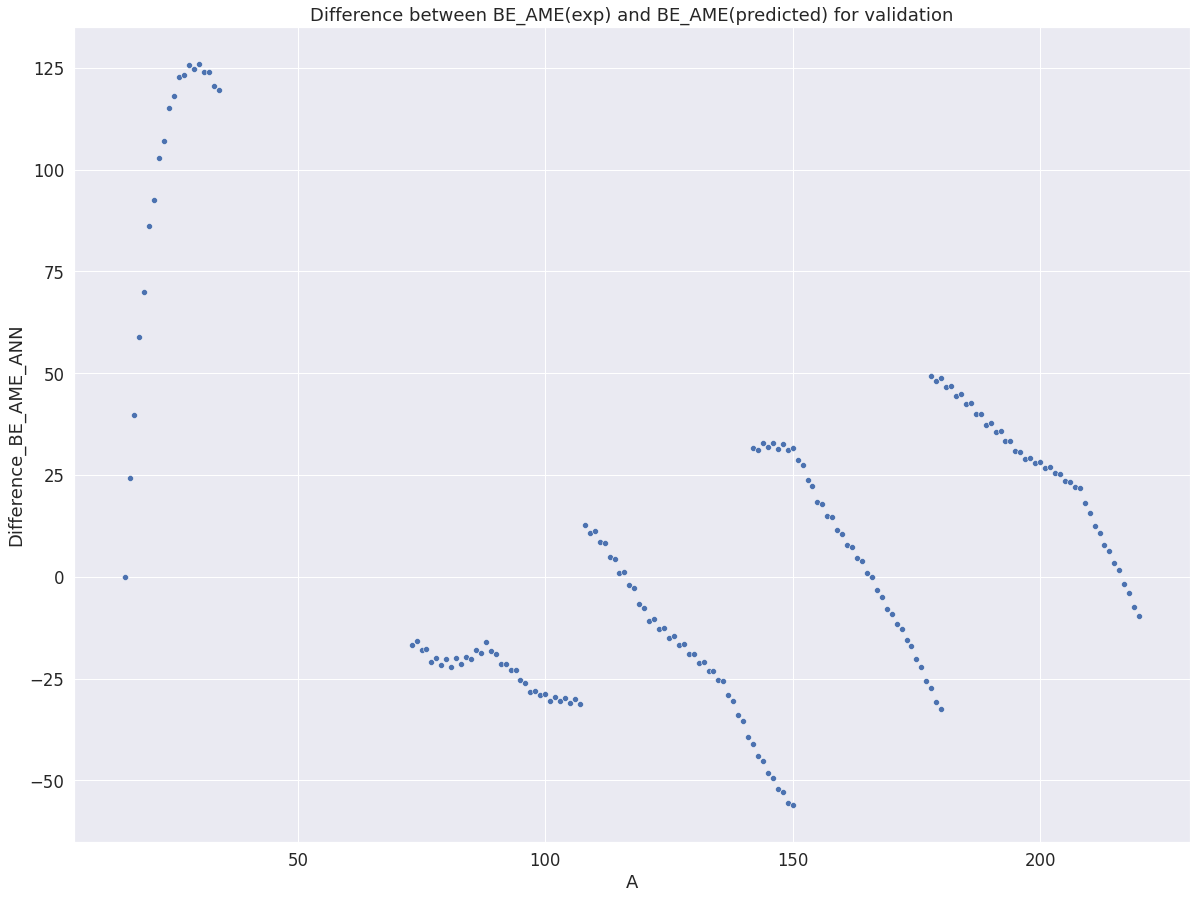

In [116]:
validation_predictions = model4.predict(x=([test_scaled_n,test_scaled_z]), batch_size=1)

validation_rescaled_predictions = [ (i - scaler.min_)/scaler.scale_ for i in validation_predictions]

validation_data["BE_Predictions"] = np.double(validation_rescaled_predictions)
validation_data["Difference_BE_AME_ANN"] = validation_data["ame_BE"] - validation_data["BE_Predictions"]


plt.figure(figsize =(20,15))
plt.title("Difference between BE_AME(exp) and BE_AME(predicted) for validation")

sns.scatterplot(x="A",y="Difference_BE_AME_ANN",data=validation_data, palette="rainbow_r")

In [117]:
rms_validation = np.sqrt(((validation_data["Difference_BE_AME_ANN"] ** 2).sum()) / len(validation_data["Difference_BE_AME_ANN"]))

print('RMS AME:', rms_validation)

RMS AME: 42.57545257954625


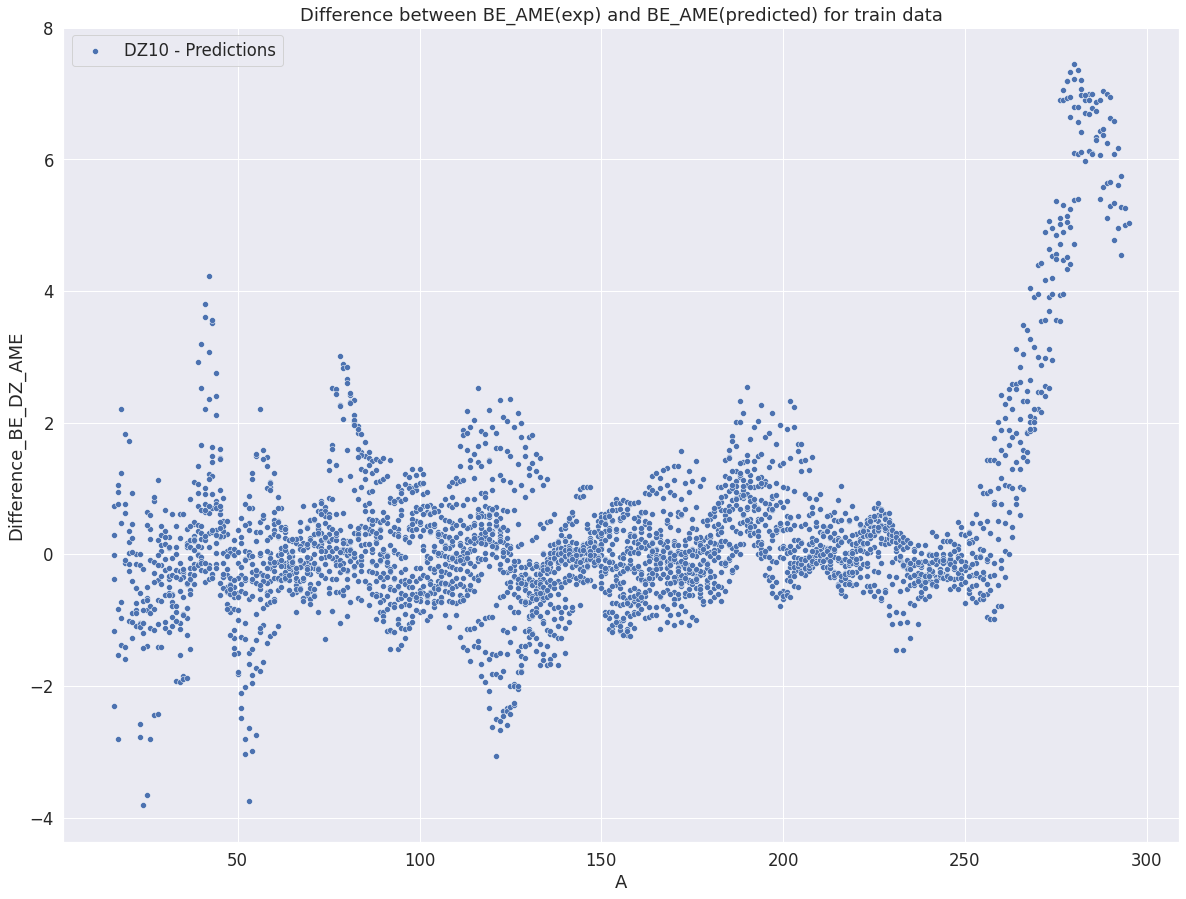

In [122]:
train_predictions = model4.predict(x=([scaled_n, scaled_z]), batch_size=1, verbose=0)

train_rescaled_predictions = [(i - scaler.min_)/scaler.scale_ for i in train_predictions]


train_data["BE_Predictions"] = np.double(train_rescaled_predictions)
train_data["Difference_BE_AME_ANN"] = train_data["ame_BE"] - train_data["BE_Predictions"]
train_data["Difference_BE_DZ_AME"] = train_data["dz_BE"] - train_data["ame_BE"]

plt.figure(figsize =(20,15))
plt.title("Difference between BE_AME(exp) and BE_AME(predicted) for train data")

#sns.scatterplot(x="A",y="Difference_BE_AME_ANN",data=train_data, palette="rainbow_r")
sns.scatterplot(x="A",y="Difference_BE_DZ_AME",data=train_data, palette="rainbow_r", label='DZ10 - Predictions')

In [120]:
rms_train = np.sqrt(((train_data["Difference_BE_AME_ANN"] ** 2).sum()) / len(train_data["Difference_BE_AME_ANN"]))

print('RMS AME:', rms_train)

RMS AME: 231.1426422568702
